The Naive Bayes Classifier is an ML algorithm that is mostly \
used in situations where each feature used to predict the outcome \
are assumed to be independent from the other features. This is why \
it's called "Naive". Naive for having the assumption that features are independent.
The "classes" will be denoted as $C_{k}$ where k represents the number of possible outcomes.
It's a discriminative algorithm (this means it's we're trying to find $P(y| x)$). \
As a result, we're going to use Bayes theorem to get the following
$$P(C_{k} | x) = \frac{P(x | C_{k}) * P(C_{k})}{P(x)}$$
where $x$ is the ith feature vector. \
The following terms will be used

- $P(C_{k} | x)$ posterior (post for after the event happened)
- $P(x | C_{k})$ likelihood (how likely the features are going to be given we know the class happening)
- $P(C_{k})$ prior (prior to the evidence happening)
- $P(x)$ evidence (events that lead to posterior existing)
  $$P(C_{k} | x) \propto \frac{P(x | C_{k}) * P(C_{k})}{P(x)}$$
  The evidence doesn't affect the outcome so we can simplify it to
  $$P(C_{k} | x) \propto P(x | C_{k}) * P(C_{k})$$
  This expands to
  $$P(C_{k} | x_{1}, x_{2}, \ldots, x_{n}) \propto P(x_{1}, x_{2}, \ldots, x_{n} | C_{k}) * P(C_{k})$$
  As mentioned before, this algorithm assumes the indepdence of events allows us to simplify it to
  $$P(C_{k} | x_{1}, x_{2}, \ldots, x_{n}) \propto P(x_{1} | C_{k})* P(x_{2} | C_{k})* \ldots * P(x_{n} | C_{k}) * P(C_{k})$$
  or
  $$P(C_{k} | x_{1}, x_{2}, \ldots, x_{n}) \propto  P(C_{k}) * \prod_{j=0}^{n}P(x_{j} | C_{k})$$
  Therefore, predicting the value becomes
  $$\hat{y}= \argmax_{k \in K} P(C_{k}| x_{1}, x_{2}, \ldots, x_{n}) = \argmax_{k \in K} P(C_{k}) * \prod_{j=0}^{n}P(x_{j} | C_{k})$$
  where $K = (k_{1}, k_{2}, \ldots, k_{l})$
  To prevent inaccuracies, we're going to use log instead to get
  $$\argmax_{k \in K} \log{P(C_{k})} + \log{\sum_{j=0}^{n}P(x_{j} | C_{k})}$$
  For calculating the log likelihood, we're going to use a probability density function (PDF) called the Gaussian function
  $$P(x_{j}| C_k) = \frac{1}{\sqrt{2\pi\sigma_{C_k}^{2}}} * \exp{\frac{-(x_{j} - \mu_{C_k})^{2}}{2\sigma_{C_k}^{2}}}$$
  Our goal for fitting is to find variance ($\sigma^{2}$) and the mean ($\mu$) $w.r.t.$ each $C_k$


In [193]:
import pandas as pd
import requests
import io
urlData = requests.get("https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv").content
# Remove parts unnecessary
parseData = "\n".join(urlData.decode("utf-8").split("#")[-1].split('\n')[1:])
df = pd.read_csv(io.StringIO(parseData))
df.loc[-1] = [
    float(column)
    for column in df.columns
]
df.columns = [
    "pregnancies",
    "glucose_tolerance_test",
    "blood_pressure",
    "skin_fold_thickness",
    "serum_insulin",
    "body_mass_index",
    "diabetes_pedigree",
    "age",
    "diabetes_class"
]
df.index = df.index + 1
df = df.sort_index()
X = df.drop(columns=['diabetes_class']).to_numpy()
y = df['diabetes_class'].to_numpy().astype(int)

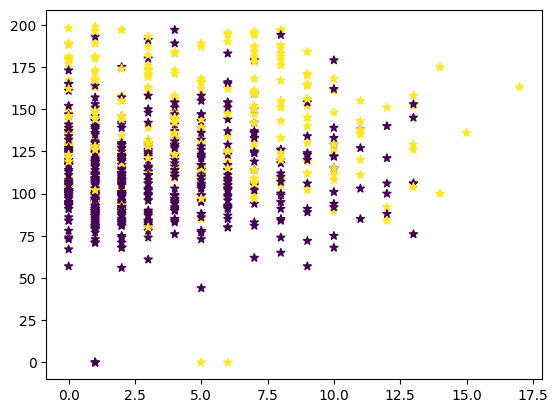

In [194]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=125
)

In [196]:
import numpy as np


class NaiveBayes:
    def _prior(self, C_k):

        return self.feature_probabilities[C_k]["prior"]

    def _gaussian_function(self, mean, var, x_j):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(
            (-((x_j - mean) ** 2)) / (2 * var)
        )

    def _likelihood(self, x_j, C_k):
        return self._gaussian_function(
            self.feature_probabilities[C_k]["mean"],
            self.feature_probabilities[C_k]["var"],
            x_j,
        )

    def _posterior(self, x_i, C_k):
        return np.log(self._prior(C_k)) + np.sum(self._likelihood(x_i, C_k))

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.feature_probabilities = [None for C_k in self.classes]
        for C_k in self.classes:
            X_c = X[y == C_k]
            mean = np.mean(X_c)
            var = np.var(X_c)
            self.feature_probabilities[C_k] = {
                "mean": mean,
                "var": var,
                "prior": np.mean(y == C_k),
            }

    def predict(self, X):
        return np.array([
            self.classes[np.argmax([self._posterior(x_i, C_k) for C_k in self.classes])] for x_i in X
        ])


nb = NaiveBayes()
nb.fit(X_train, y_train)
L = 1
accurate = 0
total = len(X_test)
prediction = nb.predict(X_test)
print("Accuracy", np.mean(prediction == y_test) * 100)

Accuracy 61.71875


In [197]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict
predictions = gnb.predict(X_test)
print("Accuracy", np.mean(prediction == y_test) * 100)

Accuracy 61.71875
